Задача 2: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:

где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import scipy as sp
import scipy.linalg as la
import math
%matplotlib inline

In [2]:
def f(x):
    return math.sin(x/5)*math.exp(x/10)+5*math.exp(-x/2)
    

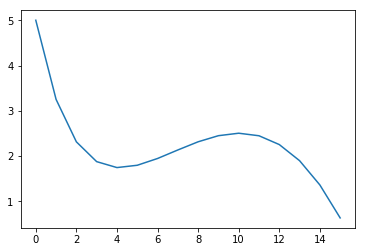

In [3]:
x = range(16)
y = list(map(f,x))

plt.plot(x,y);

In [15]:
#a = np.array([[1,1],[1,15]])
a = np.array([[1,1],[1,15]])
b = np.array([f(1),f(15)])
w1 = la.solve(a,b)
w1

array([ 3.43914511, -0.18692825])

In [16]:
def f1(x):
    return w1[0]+w1[1]*x


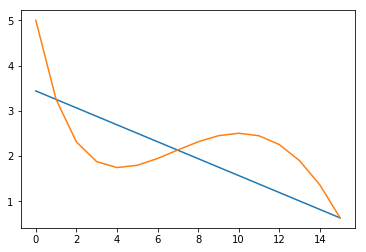

In [26]:

y1 = list(map(f1,x))

plt.plot(x,y1);
plt.plot(x,y);

2.Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?


In [31]:
a2 = np.array([[1,1,1],[1,8,8**2],[1,15,15**2]])
b2 = np.array([f(1),f(8),f(15)])
w2 = la.solve(a2,b2)
w2


array([ 3.32512949, -0.06531159, -0.00760104])

In [32]:
def f2(x):
    return w2[0]+w2[1]*x+w2[2]*(x**2)

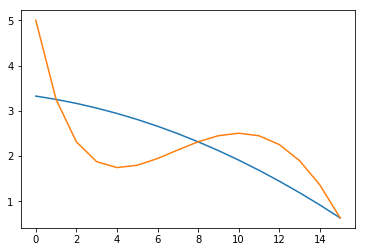

In [33]:

y2 = list(map(f2,x))

plt.plot(x,y2);
plt.plot(x,y);

3.Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)

In [35]:
a3 = np.array([[1,1,1,1],[1,4,4**2,4**3],[1,10,10**2,10**3],[1,15,15**2,15**3]])
b3 = np.array([f(1),f(4),f(10),f(15)])
w3 = la.solve(a3,b3)
w3


array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

In [36]:
def f3(x):
    return w3[0]+w3[1]*x+w3[2]*(x**2)+w3[3]*(x**3)


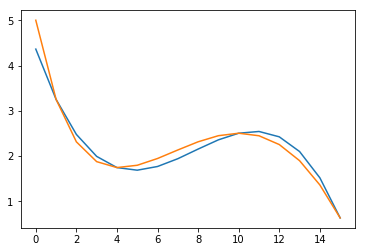

In [37]:
y3 = list(map(f3,x))

plt.plot(x,y3);
plt.plot(x,y);

4.Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).